## Importing Libries

In [81]:
import numpy as numpy
import pandas as pd
import glob #pip install pandas numpy scikit-learn missingno
import missingno as msno
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 

states=glob.glob('dataset/states*')

## Combine all data

In [82]:
states_df=[]

for state in states:
  data=pd.read_csv(state)
  states_df.append(data)
  
combined_states=pd.concat(states_df)

combined_states.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,"$59,125.27",510388M_543273F
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,"$46,296.81",2322409M_2455167F
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,"$51,805.41",423477M_419713F
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,"$47,328.08",3167756M_3331859F
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,"$55,874.52",13171316M_13367298F


## Melt Data

In [83]:
reshaped_data=pd.melt(
    combined_states,
    id_vars=['State','TotalPop','Income','GenderPop'],
    value_vars=['Hispanic','White','Black','Native','Asian','Pacific'],
    var_name='race',
    value_name='PopPercentage'
)
reshaped_data.head()

,State,TotalPop,Income,GenderPop,race,PopPercentage
0,Rhode Island,1053661,"$59,125.27",510388M_543273F,Hispanic,13.36%
1,South Carolina,4777576,"$46,296.81",2322409M_2455167F,Hispanic,5.06%
2,South Dakota,843190,"$51,805.41",423477M_419713F,Hispanic,3.24%
3,Tennessee,6499615,"$47,328.08",3167756M_3331859F,Hispanic,4.72%
4,Texas,26538614,"$55,874.52",13171316M_13367298F,Hispanic,38.05%


## Checking For Duplicates

In [84]:

reshaped_data.duplicated().sum()

54

## droping duplicates

In [85]:
reshaped_data=reshaped_data.drop_duplicates()
reshaped_data.duplicated().sum()

0

In [86]:
reshaped_data.head()

,State,TotalPop,Income,GenderPop,race,PopPercentage
0,Rhode Island,1053661,"$59,125.27",510388M_543273F,Hispanic,13.36%
1,South Carolina,4777576,"$46,296.81",2322409M_2455167F,Hispanic,5.06%
2,South Dakota,843190,"$51,805.41",423477M_419713F,Hispanic,3.24%
3,Tennessee,6499615,"$47,328.08",3167756M_3331859F,Hispanic,4.72%
4,Texas,26538614,"$55,874.52",13171316M_13367298F,Hispanic,38.05%


## cleaning Income feature

In [87]:
reshaped_data.Income=reshaped_data.Income.str.replace('[$,]','',regex=True)
reshaped_data.Income

0      59125.27 
1      46296.81 
2      51805.41 
3      47328.08 
4      55874.52 
         ...    
354    43296.36 
355    70354.74 
356    54207.82 
357    41935.63 
358    67264.78 
Name: Income, Length: 306, dtype: object

## cleaning and reshaping GenderPop feature

In [88]:
split_data=reshaped_data.GenderPop.str.split('_',expand=True)
split_data

,0,1
0,510388M,543273F
1,2322409M,2455167F
2,423477M,419713F
3,3167756M,3331859F
4,13171316M,13367298F
...,...,...
354,2341093M,2489527F
355,384160M,349215F
356,3299088M,3342840F
357,1451913M,1506295F


 ## cleaning PopPercentage

In [89]:
reshaped_data.PopPercentage=reshaped_data.PopPercentage.str.replace('(\%)','',regex=True)
reshaped_data.PopPercentage

<>:1: SyntaxWarning: invalid escape sequence '\%'
<>:1: SyntaxWarning: invalid escape sequence '\%'
/var/folders/yh/7k5bf4ln10s4_h2kj1zxwpnh0000gn/T/ipykernel_46566/4047955742.py:1: SyntaxWarning: invalid escape sequence '\%'
  reshaped_data.PopPercentage=reshaped_data.PopPercentage.str.replace('(\%)','',regex=True)


0      13.36
1       5.06
2       3.24
3       4.72
4      38.05
       ...  
354     0.03
355     1.06
356     0.17
357     0.15
358     0.35
Name: PopPercentage, Length: 306, dtype: object

## getting male Population and changing data type


In [90]:
reshaped_data['malePop']=split_data[0].str.replace('M','',regex=True)
reshaped_data['malePop']=pd.to_numeric(reshaped_data['malePop'])

## getting female Population and changing data type

In [91]:
reshaped_data['femalePop']=split_data[1].str.replace('F','',regex=True)
reshaped_data['femalePop']=pd.to_numeric(reshaped_data['femalePop'])

In [92]:
reshaped_data=reshaped_data.drop(columns=['GenderPop'])
reshaped_data

,State,TotalPop,Income,race,PopPercentage,malePop,femalePop
0,Rhode Island,1053661,59125.27,Hispanic,13.36,510388,543273.0
1,South Carolina,4777576,46296.81,Hispanic,5.06,2322409,2455167.0
2,South Dakota,843190,51805.41,Hispanic,3.24,423477,419713.0
3,Tennessee,6499615,47328.08,Hispanic,4.72,3167756,3331859.0
4,Texas,26538614,55874.52,Hispanic,38.05,13171316,13367298.0
...,...,...,...,...,...,...,...
354,Alabama,4830620,43296.36,Pacific,0.03,2341093,2489527.0
355,Alaska,733375,70354.74,Pacific,1.06,384160,349215.0
356,Arizona,6641928,54207.82,Pacific,0.17,3299088,3342840.0
357,Arkansas,2958208,41935.63,Pacific,0.15,1451913,1506295.0


## NaN values

In [93]:
reshaped_data

,State,TotalPop,Income,race,PopPercentage,malePop,femalePop
0,Rhode Island,1053661,59125.27,Hispanic,13.36,510388,543273.0
1,South Carolina,4777576,46296.81,Hispanic,5.06,2322409,2455167.0
2,South Dakota,843190,51805.41,Hispanic,3.24,423477,419713.0
3,Tennessee,6499615,47328.08,Hispanic,4.72,3167756,3331859.0
4,Texas,26538614,55874.52,Hispanic,38.05,13171316,13367298.0
...,...,...,...,...,...,...,...
354,Alabama,4830620,43296.36,Pacific,0.03,2341093,2489527.0
355,Alaska,733375,70354.74,Pacific,1.06,384160,349215.0
356,Arizona,6641928,54207.82,Pacific,0.17,3299088,3342840.0
357,Arkansas,2958208,41935.63,Pacific,0.15,1451913,1506295.0


In [94]:
reshaped_data.isna().sum()

State             0
TotalPop          0
Income            0
race              0
PopPercentage     4
malePop           0
femalePop        12
dtype: int64

## Showing Missing Data 

In [95]:
missing_data = reshaped_data[reshaped_data.isnull().any(axis=1)]


missing_data[['State', 'race', 'TotalPop', 'PopPercentage', 'femalePop']].sort_values('State')

,State,race,TotalPop,PopPercentage,femalePop
348,Colorado,Pacific,5278906,NaN,2630239.0
350,Delaware,Pacific,926454,NaN,478041.0
343,Kansas,Pacific,2892987,NaN,1453125.0
12,Maryland,Hispanic,5930538,8.47,NaN
72,Maryland,White,5930538,52.68,NaN
132,Maryland,Black,5930538,30.68,NaN
192,Maryland,Native,5930538,0.20,NaN
252,Maryland,Asian,5930538,5.33,NaN
312,Maryland,Pacific,5930538,0.04,NaN
19,Montana,Hispanic,1014699,3.27,NaN


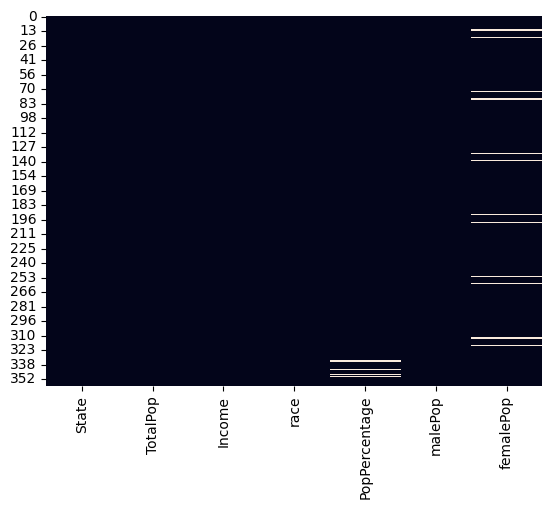

In [96]:
sns.heatmap(reshaped_data.isnull(), cbar=False)
plt.show()

## Handling Missing Data 

<Axes: >

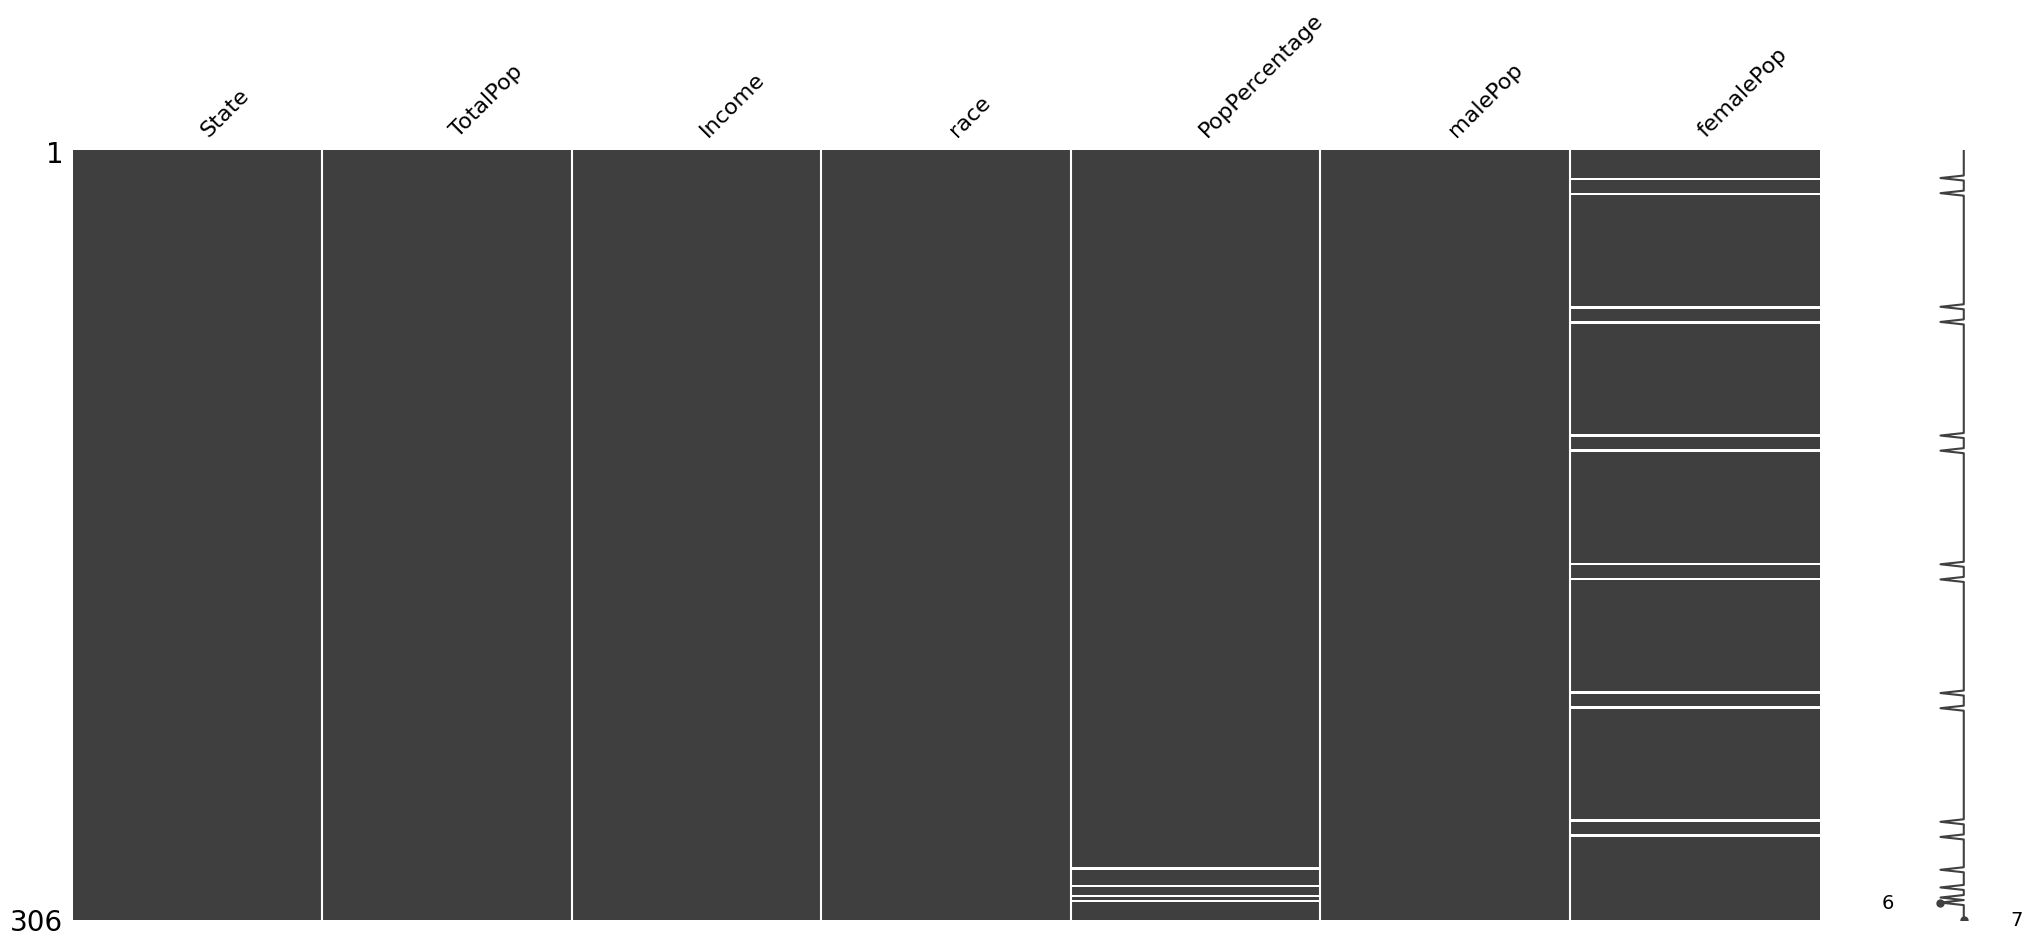

In [97]:
msno.matrix(reshaped_data)

## Listwise deletion

In [104]:
reshaped_data.dropna(inplace=True)
reshaped_data.isna().sum()

State            0
TotalPop         0
Income           0
race             0
PopPercentage    0
malePop          0
femalePop        0
dtype: int64

In [105]:
reshaped_data

,State,TotalPop,Income,race,PopPercentage,malePop,femalePop
0,Rhode Island,1053661,59125.27,Hispanic,13.36,510388,543273.0
1,South Carolina,4777576,46296.81,Hispanic,5.06,2322409,2455167.0
2,South Dakota,843190,51805.41,Hispanic,3.24,423477,419713.0
3,Tennessee,6499615,47328.08,Hispanic,4.72,3167756,3331859.0
4,Texas,26538614,55874.52,Hispanic,38.05,13171316,13367298.0
...,...,...,...,...,...,...,...
354,Alabama,4830620,43296.36,Pacific,0.03,2341093,2489527.0
355,Alaska,733375,70354.74,Pacific,1.06,384160,349215.0
356,Arizona,6641928,54207.82,Pacific,0.17,3299088,3342840.0
357,Arkansas,2958208,41935.63,Pacific,0.15,1451913,1506295.0
